## Step 1: Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt






import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Dataset.

In [68]:
df = pd.read_csv("./Carbon_(CO2)_Emissions_by_Country.csv")

In [69]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [70]:
df.shape

(5677, 5)

In [71]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic Of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'I

In [72]:
df["Country"].nunique()

190

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [74]:
df.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


## Step3: Data Cleaning and Exploration.

In [75]:
df.isnull().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

In [76]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2011-01-01
1      2012-01-01
2      2010-01-01
3      2019-01-01
4      2018-01-01
          ...    
5672   2004-01-01
5673   2007-01-01
5674   2010-01-01
5675   2009-01-01
5676   2008-01-01
Name: Date, Length: 5677, dtype: datetime64[ns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 5677 non-null   object        
 1   Region                  5677 non-null   object        
 2   Date                    5677 non-null   datetime64[ns]
 3   Kilotons of Co2         5677 non-null   float64       
 4   Metric Tons Per Capita  5677 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 221.9+ KB


## Step 4: Exploratory Data Analysis (EDA)

In [78]:
# mean of Kilotons of CO2 by different region
regional_emissions = df.groupby("Region")["Kilotons of Co2"].mean()
print(regional_emissions, "\n")

# yearly total CO2 emmission for all region
yearly_emissions = df.groupby(df["Date"].dt.year)["Kilotons of Co2"].sum()
print(yearly_emissions)

Region
Africa       18387.753950
Americas    204381.210200
Asia        262610.714557
Europe      145825.438943
Oceania      27821.352633
Name: Kilotons of Co2, dtype: float64 

Date
1990    20341800.00
1991    20482540.00
1992    20513040.00
1993    20651120.00
1994    20765250.00
1995    21356750.00
1996    21807640.00
1997    22183020.00
1998    22303000.00
1999    22406130.00
2000    23123390.00
2001    23518340.00
2002    23833349.80
2003    24939900.31
2004    26073289.89
2005    27039670.03
2006    27916500.20
2007    28968049.92
2008    29191159.84
2009    28867640.01
2010    30619529.64
2011    31584239.82
2012    32015620.18
2013    32665170.52
2014    32742940.00
2015    32541869.55
2016    32564800.27
2017    33053139.82
2018    33817899.77
2019    33871179.99
Name: Kilotons of Co2, dtype: float64


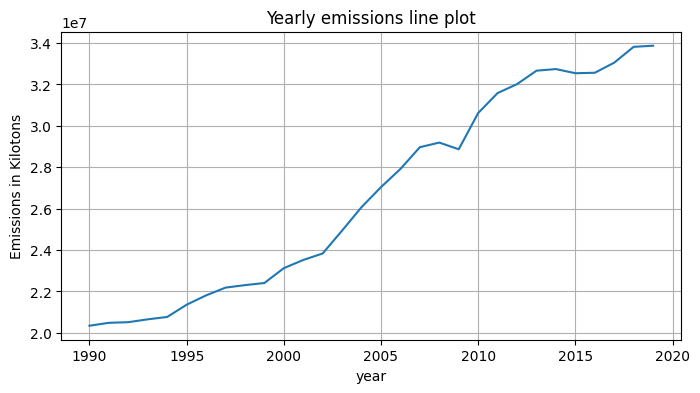

In [110]:
# line plot: Yearly CO2 emissions
plt.figure(figsize=(8, 4))
sns.lineplot(x=yearly_emissions.index, y=yearly_emissions.values)
plt.title("Yearly emissions line plot")
plt.xlabel("year")
plt.ylabel("Emissions in Kilotons")
plt.grid()
plt.show()

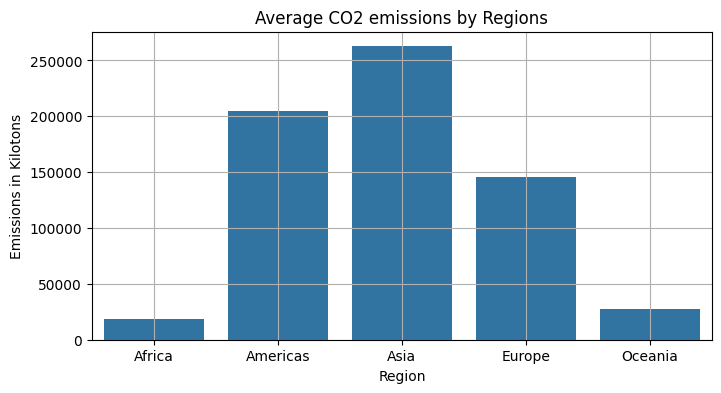

In [111]:
# bar plot: average CO2 emissions by regions
plt.figure(figsize=(8,4))
sns.barplot(x=regional_emissions.index, y=regional_emissions.values)
plt.title("Average CO2 emissions by Regions")
plt.xlabel("Region")
plt.ylabel("Emissions in Kilotons")
plt.grid()
plt.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 5677 non-null   object        
 1   Region                  5677 non-null   object        
 2   Date                    5677 non-null   datetime64[ns]
 3   Kilotons of Co2         5677 non-null   float64       
 4   Metric Tons Per Capita  5677 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 221.9+ KB


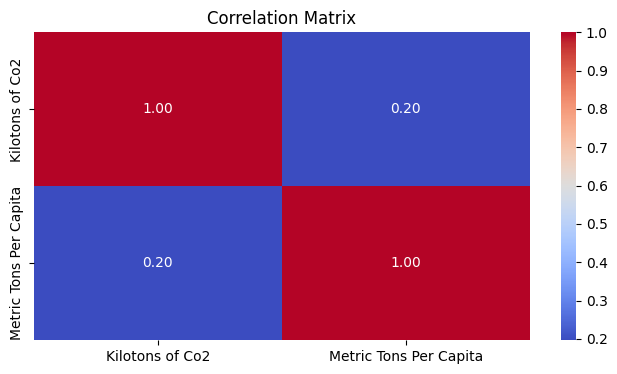

In [122]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', "int64"])
numeric_df

# compute the correlation matrix
correlation_matrix = numeric_df.corr()

# plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()